### Ajay Choudhury (18018)
### EECS(2018)
Assignment 4 (Heart-disease classification)

### Importing required libraries

In [17]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split  
from sklearn.preprocessing import StandardScaler 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

### Reading .csv dataset

In [18]:
df = pd.read_csv('heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


### Countplot for the given data to visualise the target

Text(0.5, 0, 'Target')

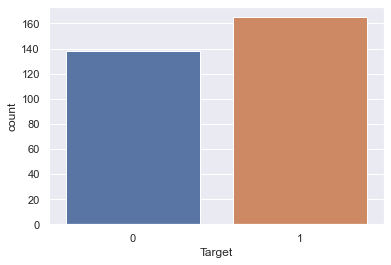

In [19]:
sns.set_theme(style="darkgrid")
sns.countplot(x=df['target'])
plt.xlabel("Target")

### Splitting the training and testing dataset
Also standardizing the training dataset before training the classifier

In [35]:
# excluding the target column
trainer = df.iloc[:, :-1].values 

# taking the taget column separately
trainer_labels = df.iloc[:, -1]

# train-test split with 80:20 ratio
x_train, x_test, y_train, y_test= train_test_split(trainer, trainer_labels, test_size= 0.2, random_state=42)

# Standardization
std_scaler = StandardScaler()
std_trainer = std_scaler.fit_transform(x_train)    

In [37]:
std_trainer.shape

(242, 13)

### Finding the best value for K (that has minimum error)

min_err:  0.08196721311475409 
Value of K:  7


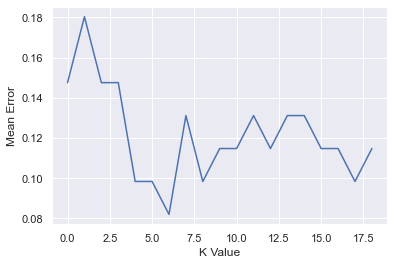

In [27]:
# Checking the best value for K (that has lowest error value)
error = []  # an empty list

for i in range(1, 20):
    knn_model = KNeighborsClassifier(n_neighbors=i)
    knn_model.fit(x_train, y_train)
    prediction = knn_model.predict(x_test)
    error.append(np.mean(prediction != y_test))

# minimum error
min_err = min(error)

# value of K
K_val = error.index(min_err)+1

# plotting for confirmation
plt.plot(error)
plt.xlabel('K Value')
plt.ylabel('Mean Error')
print("min_err: ", min_err,"\nValue of K: ", K_val)

### Training a KNN Classifier model with best found value of K

In [45]:
# Suitable value of K is 7
model = KNeighborsClassifier(n_neighbors=7)  

# training model
model.fit(std_trainer, y_train)

KNeighborsClassifier(n_neighbors=7)

### Prediction on the Test dataset

In [46]:
# standardization of test dataset
std_tester = std_scaler.transform(x_test)

In [47]:
std_tester.shape

(61, 13)

In [48]:
# classifying using the model on test dataset
predictions = model.predict(std_tester) 

In [56]:
print('Predictions: ', predictions, '\nActual: ', list(y_test))

Predictions:  [0 0 1 0 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 1 0 0 1 1 1 1 1 0 1 0 0 0 0 1 0 1
 1 1 1 1 1 1 1 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0] 
Actual:  [0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0]


In [57]:
# confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)
conf_matrix

array([[27,  2],
       [ 3, 29]], dtype=int64)

### Checking the classifier's accuracy

In [58]:
accuracy_score(y_test, predictions)

0.9180327868852459

### Creating a new dataframe

In [60]:
# creating a new dataframe for predictions on test dataset
new_df = pd.DataFrame()
new_df['prediction'] = predictions
new_df['actual'] = list(y_test)

In [61]:
new_df

,prediction,actual
0,0,0
1,0,0
2,1,1
3,0,0
4,1,1
...,...,...
56,0,0
57,1,1
58,0,0
59,0,0


### Countplot for Predicted data on Test dataset

Text(0.5, 0, 'Predicted Target')

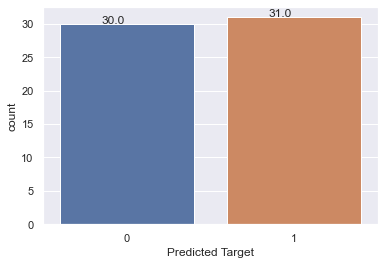

In [67]:
sns.set_theme(style="darkgrid")
ax = sns.countplot(x=new_df['prediction'])

for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.xlabel("Predicted Target")

### Countplot for actual data on test dataset

Text(0.5, 0, 'Actual Target')

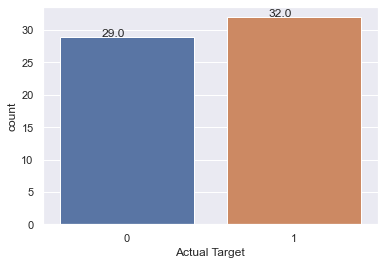

In [68]:
sns.set_theme(style="darkgrid")

ax = sns.countplot(x=new_df['actual'])

for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.xlabel("Actual Target")